In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import convolve

(201, 201)


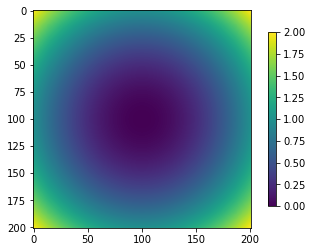

In [21]:
x = np.linspace(-1,1,201)
z = np.linspace(-1,1,201)
f = np.zeros((201,201))
for i in range(201):
    for j in range(201):
        f[i,j] = x[i]**2 + z[j]**2
print(f.shape)
plt.imshow(f)
plt.colorbar(shrink=0.8)
plt.show()

In [29]:
kernal = np.array([[1, -1, 0],[-2, 2, 0],[1, -1, 0]])
c = convolve(f, kernal, mode='same') / 0.01**3

print(f)
print(c)

[[2.     1.9801 1.9604 ... 1.9604 1.9801 2.    ]
 [1.9801 1.9602 1.9405 ... 1.9405 1.9602 1.9801]
 [1.9604 1.9405 1.9208 ... 1.9208 1.9405 1.9604]
 ...
 [1.9604 1.9405 1.9208 ... 1.9208 1.9405 1.9604]
 [1.9801 1.9602 1.9405 ... 1.9405 1.9602 1.9801]
 [2.     1.9801 1.9604 ... 1.9604 1.9801 2.    ]]
[[ 1.99000000e+04  1.97000000e+04  1.95000000e+04 ... -1.97000000e+04
  -1.99000000e+04  2.01990000e+06]
 [ 3.22982786e-10  7.89973875e-10 -1.00101043e-09 ... -1.33299482e-10
   6.45843788e-10 -2.00000000e+02]
 [-9.91251393e-10 -7.09150798e-11  4.55806336e-10 ... -1.59970815e-10
   4.61549966e-10 -2.00000000e+02]
 ...
 [-9.76586853e-10 -2.01661375e-11  3.93400227e-10 ... -2.30370792e-10
   4.33735824e-10 -2.00000000e+02]
 [ 6.95196085e-10  7.00445430e-10 -8.53975096e-10 ... -1.56025424e-10
   9.07025693e-10 -2.00000000e+02]
 [ 1.99000000e+04  1.97000000e+04  1.95000000e+04 ... -1.97000000e+04
  -1.99000000e+04  2.01990000e+06]]


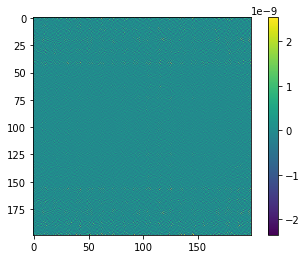

In [32]:
plt.imshow(c[1:-1,1:-1])
plt.colorbar()
plt.show()

In [6]:
pmodel = np.ones((11,11),dtype=float) * 3000
model1 = np.ones((11,11),dtype=float) * 2000
model2 = np.ones((11,11),dtype=float) * 2500

model3 = model1**2 * model2
vx = np.zeros((11,11),dtype=float)
vx[5,5] = 23.4

kernal = np.array([[0,1,0],[0,-1,0],[0,0,0]])

result = 0.001 / pmodel * convolve(vx, kernal, mode='same') * 100 * model3

print(result)

[[       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.  7800000.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0. -7800000.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
         0.        0.        0.        0.]
 [       0.        0.        0.        0.        0.        0.        0.
        

In [23]:
nx = nz = 100
dt = 0.001
dz = dx = 100

u = np.zeros((nx,nz),dtype=float)
v = np.zeros((nx,nz),dtype=float)

pmodel = np.ones((nx,nz),dtype=float) * 3000
vpmodel = np.ones((nx,nz),dtype=float) * 2500
vsmodel = np.ones((nx,nz),dtype=float) * 1600


c11 = pmodel * np.power(vpmodel, 2)
c44 = pmodel * np.power(vsmodel, 2)
c13 = c11 - 2 * c44

u[50,50] = -23.7

output = np.zeros((nx, nz), dtype=float)

kernal = np.array([[0,0,0],[0,1,-1],[0,0,0]])
one = (dt * c11) / (dz) * convolve(v, kernal, mode='same')

print("++++++++++++")
print(one)
print("++++++++++++")

print(c13 * dt / dz)
print(u)
print(convolve(u, kernal, mode='same'))
kernal = np.array([[0,1,0],[0,-1,0],[0,0,0]])
two = (dt * c13) / (dx) * convolve(u, kernal, mode='same', method='direct')
print("******************")
print(two)
print("******************")

output = one + two

print(one[0,2] + two[0,2])
print("-----------")
print(output)
print("-----------")


++++++++++++
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
++++++++++++
[[33900. 33900. 33900. ... 33900. 33900. 33900.]
 [33900. 33900. 33900. ... 33900. 33900. 33900.]
 [33900. 33900. 33900. ... 33900. 33900. 33900.]
 ...
 [33900. 33900. 33900. ... 33900. 33900. 33900.]
 [33900. 33900. 33900. ... 33900. 33900. 33900.]
 [33900. 33900. 33900. ... 33900. 33900. 33900.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-1.14328016e-17  6.04190626e-17  2.90528672e-17 ... -1.59085584e-17
   3.34639501e-17  3.76106667e-17]
 [-9.05738436e-18 -3.67038994e-17  6.70105571e-17 ...  1.63270476e-17
  -2.13586084e-17 -1.02046362e-17]
 [-1.26350989e-16  3.32404217e-16 -1.66297869e-16 ...  1.66861115e-16
   1.80967190e-17 -9.55043877e-17]
 ...
 [-7.59012835e-17  9.14387936e-18 -1.74552